In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train_data.csv', 'test_data.csv', 'train_AV3.csv', 'Sample_Submission_AV3.csv', 'train_prediction.csv', 'test_AV3.csv']


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv("../input/train_AV3.csv")
test_df = pd.read_csv("../input/test_AV3.csv")

In [90]:
train_data = pd.read_csv("../input/train_data.csv")

In [103]:
train_data.shape

(100, 12)

In [92]:
test_data = pd.read_csv("../input/test_data.csv")

In [104]:
test_data.shape

(500, 12)

In [96]:
train_prediction = pd.read_csv("../input/train_prediction.csv")

In [100]:
sample_submission = pd.read_csv("../input/Sample_Submission_AV3.csv")

In [ ]:
#It appears that the data does not have test data with actual outcomes. Hence there is no data to compare 
#the predictions after the model is trained with the training data

In [4]:
print("the shape of the training data is ", train_df.shape)
print("the shape of the test data is ", test_df.shape)
print('total data is ', train_df.shape[0]+test_df.shape[0])

the shape of the training data is  (614, 13)
the shape of the test data is  (367, 12)
total data is  981


In [5]:
train_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
print("number of columns in the data is",len(train_df.columns))
print("the columns are:", train_df.columns)

number of columns in the data is 13
the columns are: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [10]:
#conclusions from info and describe 
print("1. gender column has",614-601,"missing values")
print("2. married column has",614-611,'missing values')
print('3. dependants column has',614-599,'missing values')
print('4. self exployed column has',614-582,'missing values')
print("5. loan amount data column has missing", 614-592,'values')
print("6. loan amount term data column has missing", 614-600,'values')
print('7. credit history column has missing', 614-564, 'values')
print("8. 84% of the applicants has credit history")

1. gender column has 13 missing values
2. married column has 3 missing values
3. dependants column has 15 missing values
4. self exployed column has 32 missing values
5. loan amount data column has missing 22 values
6. loan amount term data column has missing 14 values
7. credit history column has missing 50 values
8. 84% of the applicants has credit history


In [11]:
print("The columns -", train_df.columns[6:10],'are numerical')
print("The rest of the data are categorical and object type")

The columns - Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object') are numerical
The rest of the data are categorical and object type


In [12]:
print("loan status is the dependant variable. Rest of the variables are independent")

loan status is the dependant variable. Rest of the variables are independent


In [13]:
print(train_df['Loan_Status'].value_counts())
print("there are 422 Y's and 192 N's. This seems to be imbalanced data")

Y    422
N    192
Name: Loan_Status, dtype: int64
there are 422 Y's and 192 N's. This seems to be imbalanced data


In [14]:
train_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

the mean of the appicant income is 5403.459283387622 . The values are distributed around mean with few outliers


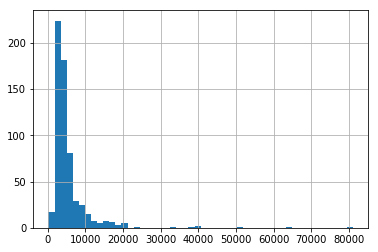

In [15]:
#UNIVARIATE DISTRIBUTION ANALYSIS
train_df['ApplicantIncome'].hist(bins=50)
print("the mean of the appicant income is", np.mean(train_df['ApplicantIncome']),'. The values are distributed around mean with few outliers')

the boxplot confirms the outlier in applicant income with largest value around 80000


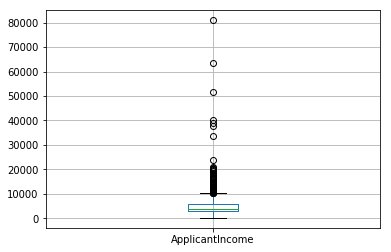

In [16]:
train_df.boxplot(column = 'ApplicantIncome')
print("the boxplot confirms the outlier in applicant income with largest value around 80000")

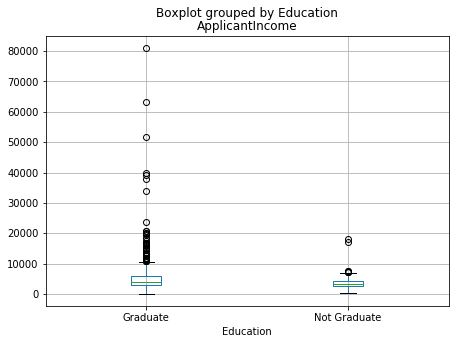

Education           Graduate  Not Graduate
ApplicantIncome  5857.433333   3777.283582


>>It can be seen that the outlier in the applicant income is due to the high education of some people.
>>There is not much differnece in mean of graduates and non graduates


In [17]:
train_df.boxplot(column ='ApplicantIncome', by = 'Education', figsize=(7,5))
plt.show()
print(train_df.pivot_table(values = 'ApplicantIncome',columns='Education',aggfunc='mean'))
print('\n')
print(">>It can be seen that the outlier in the applicant income is due to the high education of some people.")
print(">>There is not much differnece in mean of graduates and non graduates")

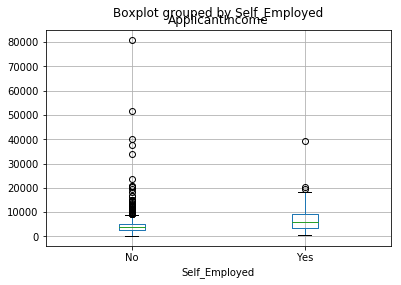

people who are not self employed have higher income


In [18]:
train_df.boxplot(column = 'ApplicantIncome', by = 'Self_Employed')
plt.show()
print("people who are not self employed have higher income")

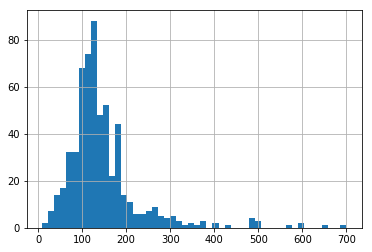

The mean of the laon amount is  146.41216216216216 and the values are centered around it
There are some extreme values also


In [19]:
train_df['LoanAmount'].hist(bins = 50)
plt.show()
print("The mean of the laon amount is ", np.mean(train_df['LoanAmount']),'and the values are centered around it')
print("There are some extreme values also")


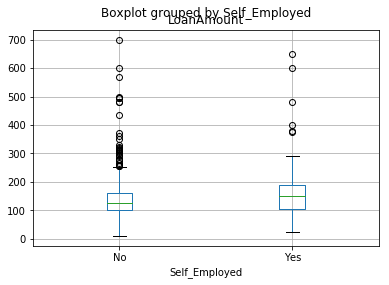

In [20]:
train_df.boxplot(column='LoanAmount', by = 'Self_Employed')

1.0    475
0.0     89
Name: Credit_History, dtype: int64


Text(0.5,1,'number of applicants with credit history')

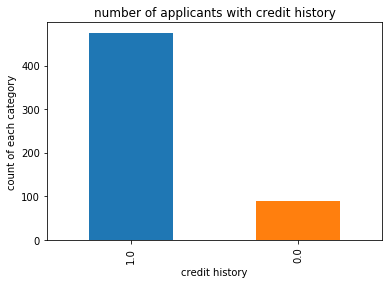

In [21]:
temp1 = train_df['Credit_History'].value_counts()
print(temp1)
temp1.plot(kind = 'bar')
plt.xlabel("credit history")
plt.ylabel("count of each category")
plt.title("number of applicants with credit history")

In [22]:
train_df["LS"] = train_df["Loan_Status"].apply(lambda x : 1 if x == 'Y' else 0)

                      LS
Credit_History          
0.0             0.078652
1.0             0.795789
The probability of getting a loan with a valid credit history is 80%


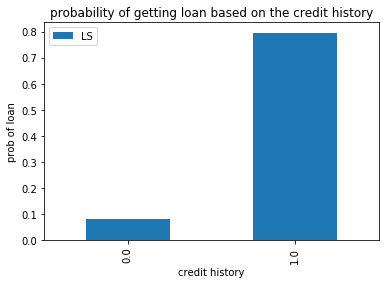

In [23]:
temp2 = train_df.pivot_table(values='LS',index = 'Credit_History')
print(temp2)
temp2.plot(kind = 'bar')
plt.xlabel("credit history")
plt.ylabel("prob of loan")
plt.title("probability of getting loan based on the credit history")
print("The probability of getting a loan with a valid credit history is 80%")

              LS
Gender          
Female  0.669643
Male    0.693252


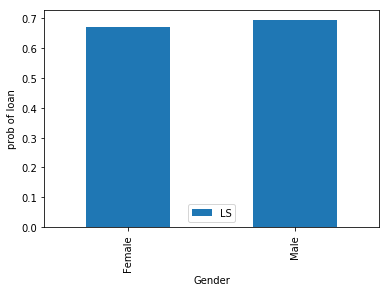

>>The probability of getting loan depending on gender is same


In [24]:
temp2 = train_df.pivot_table(values = 'LS',index = 'Gender' )
print(temp2)
temp2.plot(kind = 'bar')
plt.ylabel("prob of loan")
plt.show()
print(">>The probability of getting loan depending on gender is same")

               LS
Married          
No       0.629108
Yes      0.716080


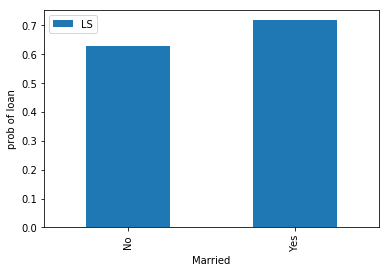

>>The probability of getting loan depending on marriage is higher


In [25]:
temp3 = train_df.pivot_table(values = 'LS',index = 'Married' )
print(temp3)
temp3.plot(kind = 'bar')
plt.ylabel("prob of loan")
plt.show()
print(">>The probability of getting loan depending on marriage is higher")

                  LS
Dependents          
0           0.689855
1           0.647059
2           0.752475
3+          0.647059


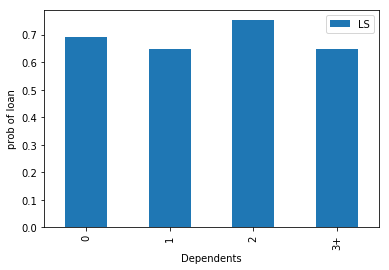

>>The probability of getting loan mostly is independant of dependants 


In [26]:
temp4 = train_df.pivot_table(values = 'LS',index = 'Dependents' )
print(temp4)
temp4.plot(kind = 'bar')
plt.ylabel("prob of loan")
plt.show()
print(">>The probability of getting loan mostly is independant of dependants ")

                     LS
Self_Employed          
No             0.686000
Yes            0.682927


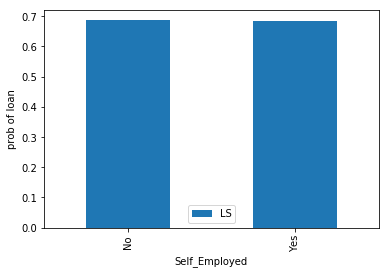

>>The probability of getting loan is almost same for self employed and non self employed  


In [27]:
temp5 = train_df.pivot_table(values = 'LS',index = 'Self_Employed' )
print(temp5)
temp5.plot(kind = 'bar')
plt.ylabel("prob of loan")
plt.show()
print(">>The probability of getting loan is almost same for self employed and non self employed  ")

                    LS
Education             
Graduate      0.708333
Not Graduate  0.611940


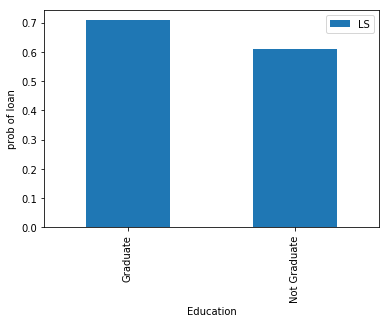

>>The probability of getting loan is little higher for graduate than non graduate


In [28]:
temp6 = train_df.pivot_table(values = 'LS',index = 'Education' )
print(temp6)
temp6.plot(kind = 'bar')
plt.ylabel("prob of loan")
plt.show()
print(">>The probability of getting loan is little higher for graduate than non graduate")

                     LS
Property_Area          
Rural          0.614525
Semiurban      0.768240
Urban          0.658416


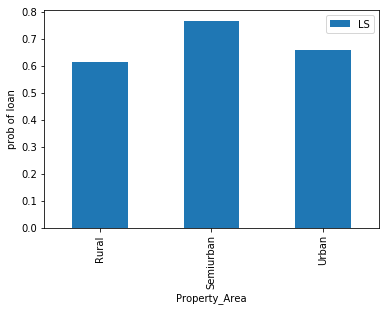

>>The probability of getting loan is little higher for semi urban area 


In [29]:
temp7 = train_df.pivot_table(values = 'LS',index = 'Property_Area' )
print(temp7)
temp7.plot(kind = 'bar')
plt.ylabel("prob of loan")
plt.show()
print(">>The probability of getting loan is little higher for semi urban area ")

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


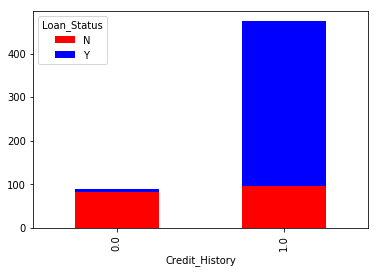

In [30]:
temp8 = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])
print(temp8)
temp8.plot(kind='bar', stacked=True, color=['red','blue'])

**DATA MUNGING**

In [31]:
#number of missing data in each column
train_df.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LS                    0
dtype: int64

In [32]:
test_df.apply(lambda x : sum(x.isnull()))

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [33]:
print(train_df['Self_Employed'].value_counts())
#majority of the values are no. Hence the missing values can be imputed to 'NO'
train_df['Self_Employed'].fillna(value = 'No', inplace = True)

No     500
Yes     82
Name: Self_Employed, dtype: int64


In [34]:
test_df['Self_Employed'].fillna(value = 'No', inplace = True)

In [35]:
train_df['Self_Employed'].isnull().sum()

0

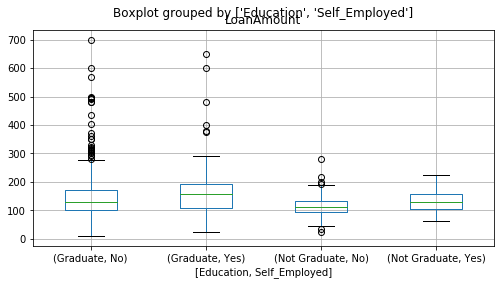

In [36]:
train_df.boxplot(column = 'LoanAmount', by = ['Education','Self_Employed'], figsize=(8,4))

In [37]:
table = train_df.pivot_table(values='LoanAmount',index = 'Self_Employed', columns = 'Education', aggfunc='median')

In [38]:
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [39]:
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

In [40]:
train_df['LoanAmount'].fillna(train_df[train_df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [41]:
test_df['LoanAmount'].fillna(test_df[test_df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [42]:
train_df['LoanAmount'].isnull().sum()

0

In [43]:
#to use the extreme values in loan amount and income, convert the values in to its log values

In [44]:
train_df["LoanAmountLog"] = train_df['LoanAmount'].apply(np.log)

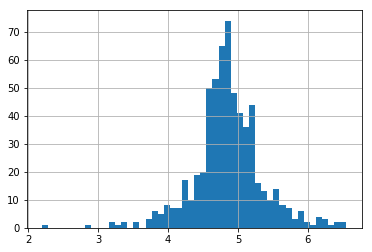

In [45]:
train_df["LoanAmountLog"].hist(bins = 50)
#now the histgram looks closer to the normal distribution and the effects of the outliers has been reduced.

In [46]:
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']

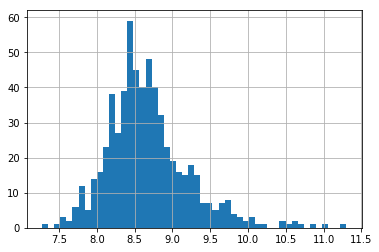

In [47]:
train_df["TotalIncomelog"] = np.log(train_df['TotalIncome'])
train_df['TotalIncomelog'].hist(bins = 50)

In [48]:
#to impute the missing gender data
train_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [49]:
#the applicants are mostly male. hence the 13 missing values will be filled as 'Male'
train_df["Gender"].fillna(value = 'Male', inplace = True)

In [50]:
test_df["Gender"].fillna(value = 'Male', inplace = True)

In [51]:
train_df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [52]:
#only 3 values are missing. Since there are more married than unmarried, the missing values will be filled as married
train_df['Married'].fillna(value = 'Yes', inplace = True)

In [53]:
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [54]:
#there are 15 missing values for dependents. Since most of the applicants do not have any dependents, missing values
#will be filled as no dependents
train_df['Dependents'].fillna(value = 0, inplace = True)

In [55]:
test_df['Dependents'].fillna(value = 0, inplace = True)

In [56]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [57]:
#there are 14 missing values for loan amount term. Most of the terms are 360. hence missing data will be replaced 
#by 360
train_df['Loan_Amount_Term'].fillna(value = 360, inplace = True)

In [58]:
test_df['Loan_Amount_Term'].fillna(value = 360, inplace = True)

In [59]:
train_df['Credit_History'].value_counts()
temp9 = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])

In [60]:
temp9

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [105]:
temp10 = train_df[train_df['Credit_History'].isnull()]


In [62]:
def f2(x):
    return 1 if x['Loan_Status']=='Y' else 0

In [63]:
train_df['Credit_History'].fillna(value = temp10.apply(f2, axis=1), inplace = True)

In [64]:
test_df['Credit_History'].fillna(value = temp10.apply(f2, axis=1), inplace = True)

In [65]:
train_df["Credit_History"].isnull().sum()

0

In [66]:
test_df["Credit_History"].isnull().sum()

28

APPLYING CLASSIFICATION MACHINE LEARNING TECHNIQUES

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
train_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LS,LoanAmountLog,TotalIncome,TotalIncomelog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,1,4.867534,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,4.948760,6000.0,8.699515


In [69]:
#converting categorical variables to numerical variables using one hot encoding

In [70]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()


In [71]:
train_df['Gender'] = le.fit_transform(train_df["Gender"])


In [72]:
train_df['Married'] = le.fit_transform(train_df["Married"])
train_df['Education'] = le.fit_transform(train_df["Education"])
train_df['Self_Employed'] = le.fit_transform(train_df["Self_Employed"])
train_df['Property_Area'] = le.fit_transform(train_df["Property_Area"])

In [73]:
train_df['Loan_Status'] = le.fit_transform(train_df["Loan_Status"])

In [80]:
predictors = ['Credit_History','Married','Education','Self_Employed','Property_Area']
outcome = 'Loan_Status'

In [81]:
classifier = LogisticRegression()

In [82]:
classifier.fit(train_df[predictors],train_df[outcome])

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
acc = cross_val_score(classifier, X= train_df[predictors], y = train_df[outcome], scoring = 'accuracy', cv=5)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [85]:
acc.mean()

0.8306980433632998

In [86]:
test_df['Gender'] = le.fit_transform(test_df["Gender"])
test_df['Married'] = le.fit_transform(test_df["Married"])
test_df['Education'] = le.fit_transform(test_df["Education"])
test_df['Self_Employed'] = le.fit_transform(test_df["Self_Employed"])
test_df['Property_Area'] = le.fit_transform(test_df["Property_Area"])

In [87]:
test_df['Credit_History'].fillna(value = 1,inplace = True)

In [88]:
y_pred = classifier.predict(test_df[predictors])

In [106]:
#since there is no outcome data for the test data, it is not possible to evaluate the accuracy of the predictions.
#The cross validation accuracy of the trianing data is about 83% as per the logit regression

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
classifier_2 = DecisionTreeClassifier()

In [109]:
classifier_2.fit(train_df[predictors],train_df[outcome])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [110]:
acc_2 = cross_val_score(classifier, X= train_df[predictors], y = train_df[outcome], scoring = 'accuracy', cv=5)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [111]:
acc_2.mean()

0.8306980433632998

In [112]:
#the decision tree calssifier also provides the same cross validation result as the logit regression